In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

data_train = pd.read_csv('./data/train.csv')
data_train.columns


/home/jiangxinyang/.virtualenvs/machine_learning-_zdHOwB3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/jiangxinyang/.virtualenvs/machine_learning-_zdHOwB3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [3]:
data_train.BsmtCond

0        TA
1        TA
2        TA
3        Gd
4        TA
5        TA
6        TA
7        TA
8        TA
9        TA
10       TA
11       TA
12       TA
13       TA
14       TA
15       TA
16       TA
17      NaN
18       TA
19       TA
20       TA
21       TA
22       TA
23       TA
24       TA
25       TA
26       TA
27       TA
28       TA
29       TA
       ... 
1430     Gd
1431     TA
1432     TA
1433     TA
1434     TA
1435     TA
1436     TA
1437     TA
1438     TA
1439     TA
1440     TA
1441     TA
1442     TA
1443     TA
1444     TA
1445     TA
1446     TA
1447     TA
1448     TA
1449     TA
1450     TA
1451     TA
1452     TA
1453     TA
1454     TA
1455     TA
1456     TA
1457     Gd
1458     TA
1459     TA
Name: BsmtCond, Length: 1460, dtype: object

In [3]:
data_train['SalePrice'].describe()  # 最小值是大于0的

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

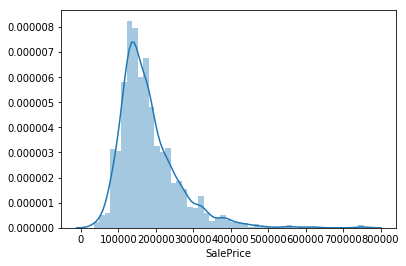

In [7]:
sns.distplot(data_train['SalePrice'])

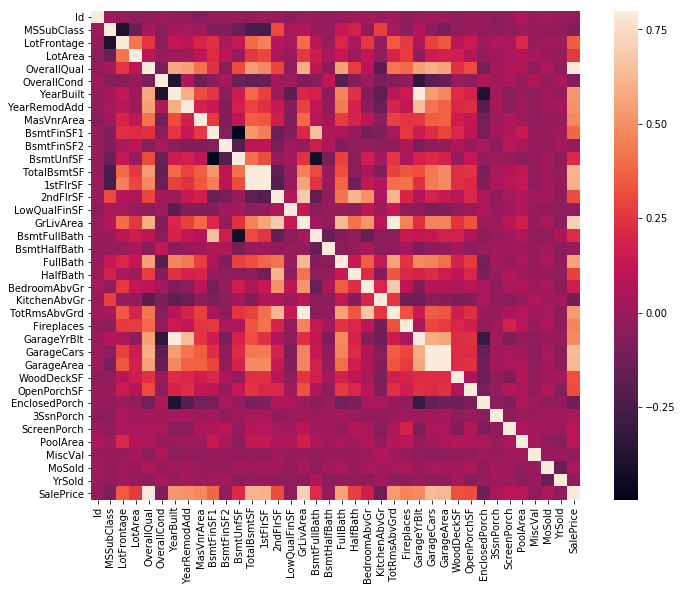

In [10]:
# 绘制数值型特征之间的相关系数
corrmat = data_train.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

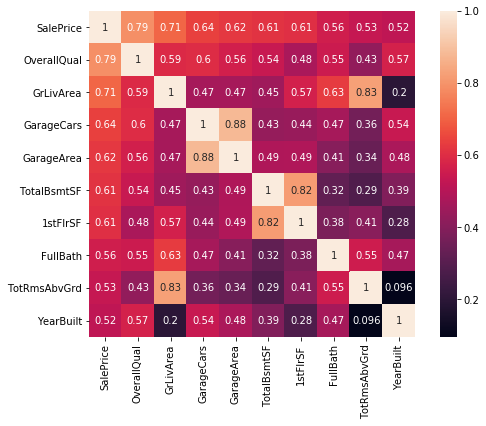

In [19]:
nlargestCols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
# nlargestCorr = np.corrcoef(data_train[nlargestCols].values.T)
nlargestCorr = data_train[nlargestCols].corr()
plt.subplots(figsize=(9, 6))
sns.heatmap(nlargestCorr, annot=True, square=True)

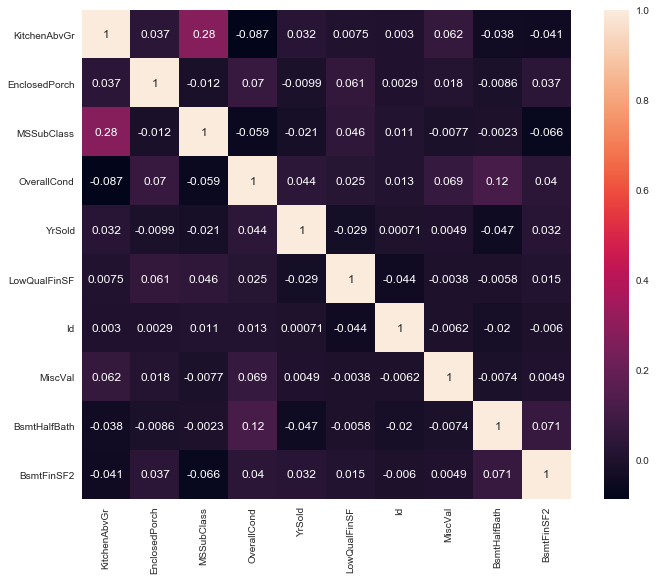

In [39]:
nsmallestCols = corrmat.nsmallest(10, 'SalePrice')['SalePrice'].index
nsmallestCorr = data_train[nsmallestCols].corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(nsmallestCorr, annot=True, square=True)

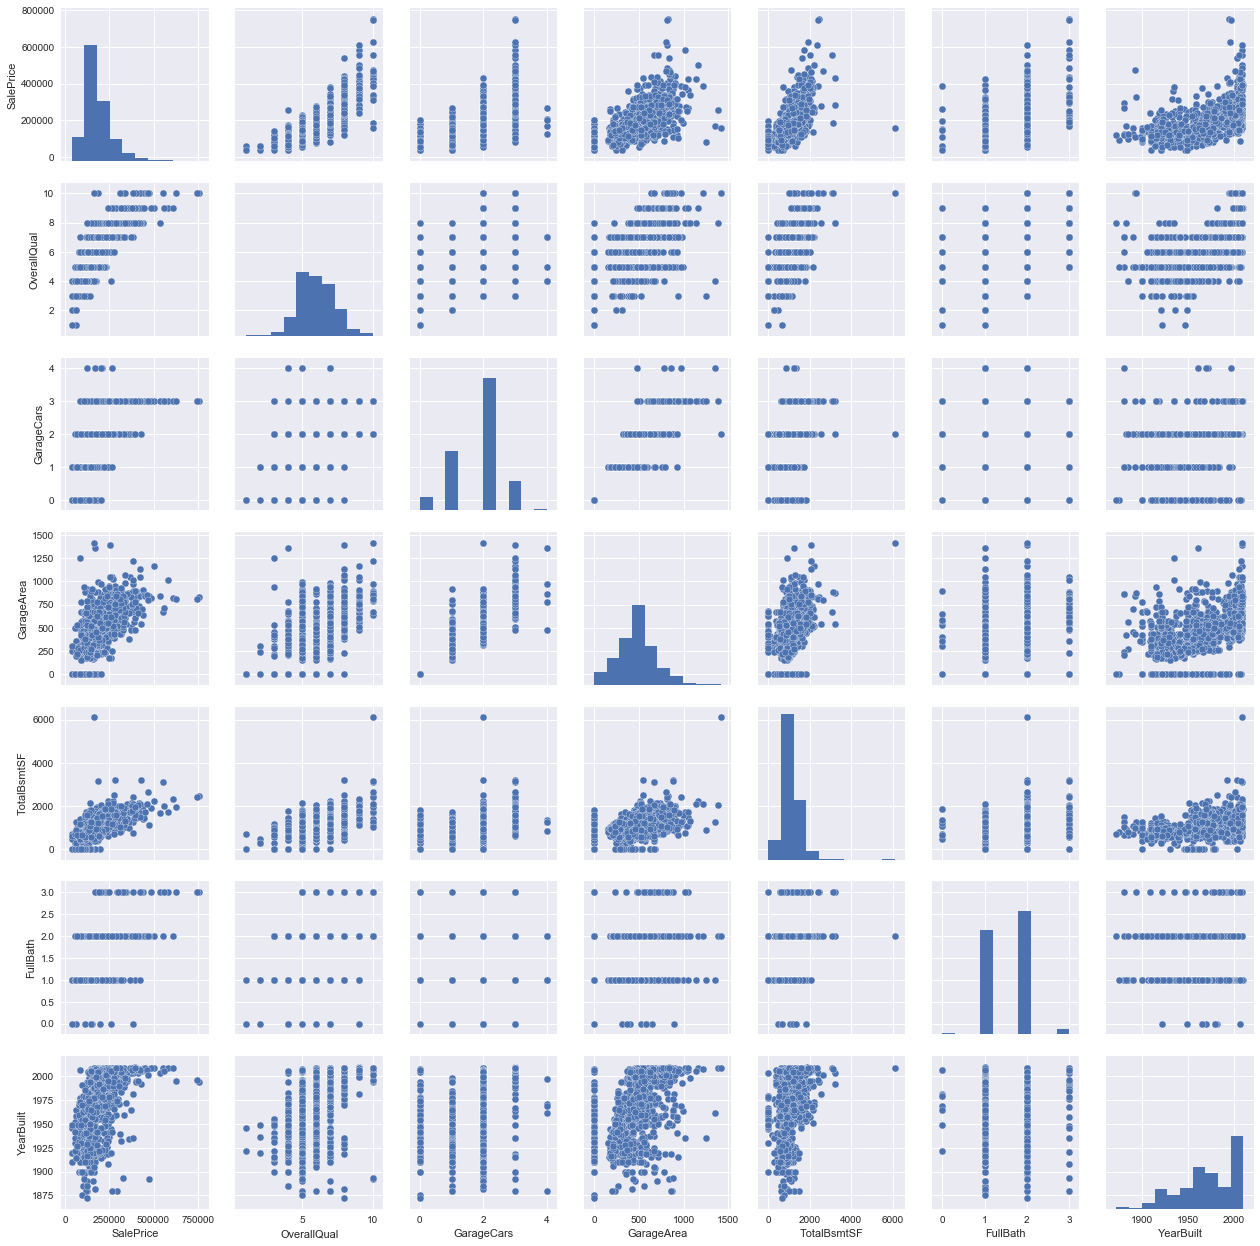

In [25]:
sns.set()
columns = ['SalePrice', 'OverallQual', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data_train[columns], size=2.5)
plt.show()

In [31]:
total = data_train.isnull().sum().sort_values(ascending=False)
percent = (data_train.isnull().sum() / data_train.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [33]:
# 看看数据集中的输出值有哪些异常点，一般规范化后偏离0值较大的值可能是异常点， 有点类似于做拟合时去掉最大最小值，因为这些可能是某些特性，不属于通性
from sklearn.preprocessing import StandardScaler
saleprice_scaled = StandardScaler().fit_transform(data_train['SalePrice'][:, np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:, 0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:, 0].argsort()][-10:]
print(low_range)
print(high_range)

[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


/home/jiangxinyang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


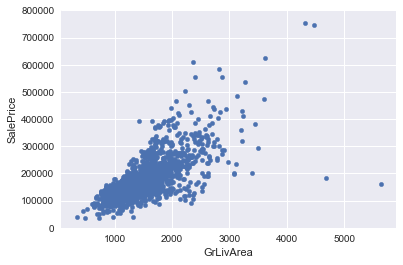

In [46]:
from scipy.stats import norm
from scipy import stats
var = 'GrLivArea'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))
# 右下脚的两个点明显偏离了线性


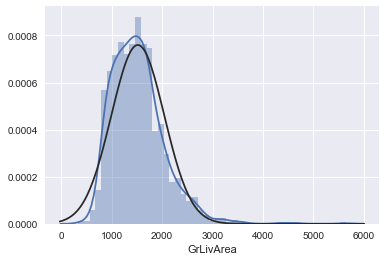

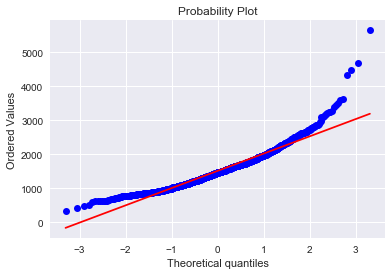

In [49]:
from scipy.stats import norm
from scipy import stats

sns.distplot(data_train[var], fit=norm)

fig = plt.figure()
res = stats.probplot(data_train[var], plot=plt)  # q-q图，判断数据是否符合正态分布
# 可以看出GrlivArea的值并不符合正态分布，对于正偏斜的数据可以做log转换

In [67]:
data_train['GrLivArea'] = np.log1p(data_train['GrLivArea'])
data_train['SalePrice'] = np.log1p(data_train['SalePrice'])
print('transformation done')


transformation done


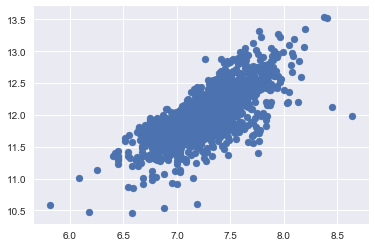

In [68]:
data = pd.concat([data_train['SalePrice'], data_train['GrLivArea']], axis=1)
plt.scatter(data_train['GrLivArea'], data_train['SalePrice'])


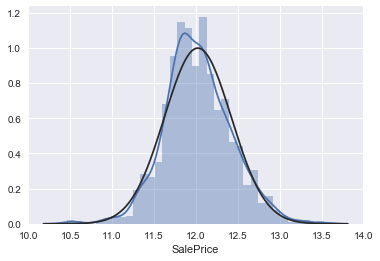

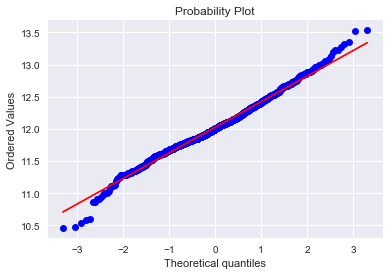

In [69]:
sns.distplot(data_train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(data_train['SalePrice'], plot=plt)

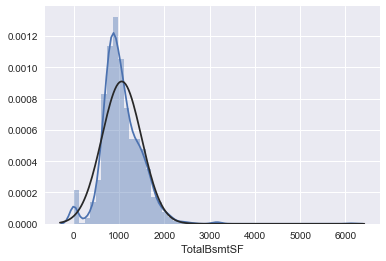

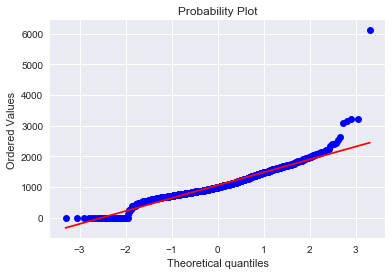

In [70]:
sns.distplot(data_train['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(data_train['TotalBsmtSF'], plot=plt)

In [71]:
data_train['TotalBsmtSF'] = np.log1p(data_train['TotalBsmtSF'])
print('transformation done')

transformation done


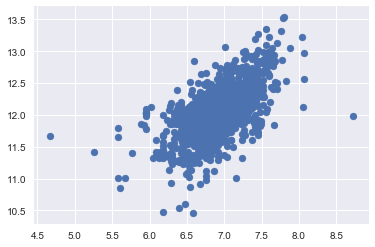

In [73]:
data = pd.concat([data_train['SalePrice'], data_train['TotalBsmtSF']], axis=1)
plt.scatter(data[data['TotalBsmtSF'] > 0]['TotalBsmtSF'], data[data['TotalBsmtSF'] > 0]['SalePrice'])

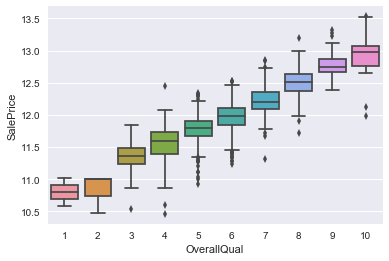

In [77]:
data = pd.concat([data_train['OverallQual'], data_train['SalePrice']], axis=1)
sns.boxplot(x='OverallQual', y='SalePrice', data=data)

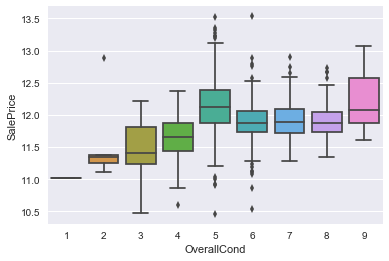

In [78]:
data = pd.concat([data_train['OverallCond'], data_train['SalePrice']], axis=1)
sns.boxplot(x='OverallCond', y='SalePrice', data=data)
# OverallCond无法很好的描述输出值，而且和OverallQual有点类似

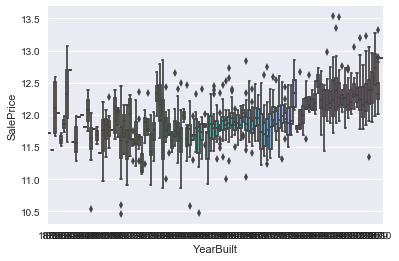

In [79]:
data = pd.concat([data_train['YearBuilt'], data_train['SalePrice']], axis=1)
sns.boxplot(x='YearBuilt', y='SalePrice', data=data)

# 毫无规律，也许这个得和地理位置结合起来

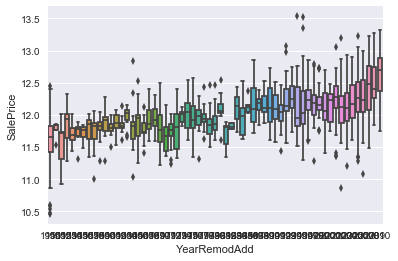

In [81]:
data = pd.concat([data_train['YearRemodAdd'], data_train['SalePrice']], axis=1)
sns.boxplot(x='YearRemodAdd', y='SalePrice', data=data)

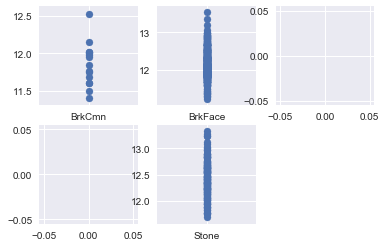

In [83]:
BrkCmn = data_train[data_train['MasVnrType'] == 'BrkCmn']
BrkFace = data_train[data_train['MasVnrType'] == 'BrkFace']
CBlock = data_train[data_train['MasVnrType'] == 'CBlock']
NOne = data_train[data_train['MasVnrType'].isnull()]
Stone = data_train[data_train['MasVnrType'] == 'Stone']

fig = plt.figure()
plt.subplot2grid((2, 3), (0, 0))
plt.scatter(BrkCmn['MasVnrType'], BrkCmn['SalePrice'])

plt.subplot2grid((2, 3), (0, 1))
plt.scatter(BrkFace['MasVnrType'], BrkFace['SalePrice'])

plt.subplot2grid((2, 3), (0, 2))
plt.scatter(CBlock['MasVnrType'], CBlock['SalePrice'])

plt.subplot2grid((2, 3), (1, 0))
plt.scatter(NOne['MasVnrType'], NOne['SalePrice'])

plt.subplot2grid((2, 3), (1, 1))
plt.scatter(Stone['MasVnrType'], Stone['SalePrice'])

plt.show()

# 可以看出该属性对价格影响不大

In [112]:
cols = ['MiscFeature', 'LotFrontage', 'Alley', 'Fence', 'GarageYrBlt', 'TotRmsAbvGrd', '1stFlrSF', 'GarageCars',
               'OverallCond', 'MasVnrArea', 'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', 'MiscVal', 'YrSold',
               'PoolArea', 'PoolQC', 'FireplaceQu', 'MasVnrType']
data_train_new = data_train.drop(cols, axis=1)
data_train_new.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,MoSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,61,0,0,2,WD,Normal,12.247699
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,TA,Y,298,0,0,0,5,WD,Normal,12.109016
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,42,0,0,9,WD,Normal,12.317171
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,TA,Y,0,35,0,0,2,WD,Abnorml,11.849405
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,TA,Y,192,84,0,0,12,WD,Normal,12.429220


In [114]:
total = data_train_new.isnull().sum().sort_values(ascending=False)
total.head(10)

GarageCond      81
GarageType      81
GarageFinish    81
GarageQual      81
BsmtFinType2    38
BsmtExposure    38
BsmtCond        37
BsmtQual        37
BsmtFinType1    37
Electrical       1
dtype: int64